# Lab 4: Counting Lattice Paths

- [Your name]
- [The name of one of your group members]
- [The name of your other group member]

## Collaboration Statement

[*Please describe the contributions of each group member. Please also describe the support you received from Course Assistants, other classmates, and any online resources such as StackExchange or ChatGPT.*]

**Learning Objectives**:

- You will practice using binomial coefficients and the principles of addition, multiplication, and inclusion-exclusion to count lattice paths in special scenarios. 
- You will implement a Python function for general lattice path-counting and check its correctness against known mathematical results. 

**Assessment**: 

Labs are assessed according to [the posted EMRN rubric](https://www.philchodrow.prof/CSCI-0200/pages/lab-assessment.html).

## General Instructions

Unlike most labs, in this one it's normal to spend time looking at your computer and typing. Please make sure to work with your group and not proceed to the next part until all group members are comfortable with the work you've done on the previous part. 

# Introduction

In this lab, we are going to write a function for counting the number of paths through lattices. To start (and get a refresher of what we're talking about), run the code block below. This code block will let you read in and visualize the lattices we are going to use in this lab. 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.special import binom

def read_lattice(part):
    """
    read a lattice from the course GitHub repository
    
    params
        part: str, the letter label of the lab problem
    
    return: 
        np.array, an array representing the lattice. 
    """
    base = "https://raw.githubusercontent.com/PhilChodrow/CSCI-0200/main/assignments/labs/04-lattice-path-data/" # remote data source
    L = np.loadtxt(base + part.lower() + ".txt")
    print(f"This lattice has {str(L.shape[0])} rows and {str(L.shape[1])} columns.")
    return L
    
def show_lattice(L):
    """
    visualize a lattice. The lattice is assumed to contain binary entries, with 0 describing blocked cells. The beginning point (bottom left corner) is marked in blue and the end point (top right corner) is marked in orange. 
    
    params: 
        L, a 2d binary numpy array. 
    
    return: 
        none
    """
    
    # initialize fig
    fig, ax = plt.subplots(1)
    ax.set_xticks(np.arange(L.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(L.shape[0]+1)-.5, minor=True)
    ax.spines[:].set_visible(False)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.axis("off")

    
    # plot the lattice
    L_ = np.flip(L, 0)
    ax.pcolor(L_, edgecolors='darkgrey', linewidths=0.5, cmap = "binary_r", vmax = 1, vmin = -0.5)
    ax.set_aspect("equal")
    
    # mark the beginning and end points
    ax.scatter(L.shape[1] - 0.5, L.shape[0] - 0.5, color = "sandybrown", edgecolors = "k", s = 100)
    ax.scatter( 0.5, 0.5, color = "skyblue", edgecolors = "k", s = 100)

Run the block below to see an example lattice: 

This lattice has 10 rows and 16 columns.


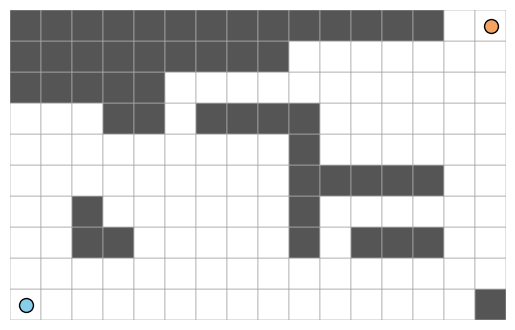

In [2]:
L = read_lattice("challenge")
show_lattice(L)

The white cells are passable, while the black cells are walls that we can't walk through. Our aim is to find the number of lattice paths, consisting only of moves up and to the right, that start at the blue beginning point and end at the orange endpoint. But we do **not** want to try to actually find all the paths -- this is going to be hard to code and take way too long even on modestly-sized maps. 

Here's what we're going to do: 

1. First, we are going to work some simple examples by hand using binomial coefficients and the principles of addition, multiplication, and inclusion-exclusion. 
2. Then, we are going to code up our function, using a code skeleton that I'll provide for you. 
3. Finally, we'll check the results of our function against our mathematical calculations. We'll find perfect agreement, of course! 

## Part B

Yes, Part B is actually at the front of the lab! Right now, you should just **run the code cell below** (and do so each time you open the lab), but otherwise you don't need to do anything until you've completed Part A. 

### B.1 

Below, I've partially implemented the function `count_lattice_paths`, which accepts a lattice `L` and returns the number of paths from the bottom left to the top right. 

In order to do this, you are going to use a *recurrence relation* which generalizes the recurrence relation for binomial coefficients in [DMOI 1.2](https://discrete.openmathbooks.org/dmoi3/sec_counting-binom.html). Let $p_{i,j}$ denote the number of lattice paths from cell $(0,0)$ to cell $(i-1,j-1)$ on the lattice (we're starting at $(0, 0)$ and subtracting 1 due to Python's zero-based indexing). Then, 

$$
p_{i,j} = 
\begin{cases} 
    0 &\quad (i,j) \text{ is impassable} \\ 
    1 &\quad (i,j) = (1,1) \text{ and } (i,j) \text{ is passable}\\ 
    p_{i-1,0} &\quad j = 0 \text{ and } i > 0 \text{ and } (i,j) \text{ is passable}\\ 
    p_{0,j-1} &\quad i = 0 \text{ and } j > 0 \text{ and } (i,j) \text{ is passable}\\ 
    p_{i-1,j} + p_{i,j-1} &\quad i,j > 0 \text{ and } (i,j) \text{ is passable}
\end{cases}
$$

In the code block below, please fill in an implementation of this logic in the specified parts of the code. I have handled the first case (if $(i,j)$ is impassable) and one of the other cases for you as an example. You need to fill in the other three. In order to work correctly, each branch of your if-statement should save the correct result to a variable called `p` as illustrated in the example. 

You should also delete the first two lines of the function body. 

In [ ]:
def count_lattice_paths(L):
    """
    return the number of lattice paths from the bottom left to the top right of a lattice L, specified as a binary np.array in which 0s represent impassable cells.
    
    params: 
        L, np.array, a binary array specifying the lattice and obstructions. 1s are passable cells and 0s are impassable cells. 
        
    return: 
        float, the number of paths in the lattice from the bottom left to the top right that do not pass through any impassable cells. 

    """
    
    # delete these two lines when you start working on Part B
    print("count_lattice_paths is not implemented: you'll come back to this in Part B")
    return -1 

    # construct a new array which will hold the path counts
    P = np.zeros_like(L)
    
    # loop through the elements of this array
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            
            # if cell is impassable, there are 0 paths to that cell
            if np.flip(L,0)[i, j] == 0:
                p = 0

            # otherwise, if cell is passable: 
            else: 
                if (i == 0) and (j != 0):
                    p = P[i, j-1]
                # your code below! Use the 
                # math description above to compute the correct value of 
                # p depending on the values of i and j. You can do this by adding some additional elif and else-classes to the inner if-statement. 

                
                
                
        
            # don't touch anything below   
            P[i, j] = p
    return P[-1,-1]   

### B.2 

**Test your code** by re-running the code blocks in Part A in order. You are looking for **exact agreement** between your "by-hand" code using binomial coefficients and the result of your implementation of `count_lattice_paths`. If there is any difference between the two answers, then something is off with either your math or your code. 

**You are done with Part B when you have run all the Part A code and found exact agreement between your binomial coefficients and your `count_lattice_paths` implementation.** You do not need to write any additional commentary or code in Part B. Once you've found exact matches for every example in Part A, you are ready to move on to Part C. 

*Note*: it is normal for this to be a nonlinear and occasionally frustrating process that requires you to revisit both your mathematical reasoning and your code. 

## Part A 

For each of the following subparts, do the following: 

1. Run the provided code block to download and view the lattice. 
2. Using *math*, write an expression describing the number of lattice paths from the blue dot to the orange dot. Give a short explanation of your answer. 
    - You can typeset binomial coefficients like this: `$\binom{n}{k}$` renders as $\binom{n}{k}$. 
3. Write and run a Python expression using the `binom` function from the `scipy` package to evaluate your mathematical expression. 
    - You should assign the result to a variable called `number_of_paths_by_hand`, which is assigned value `-1` in the script currently. 
    - Include a call `print(count_lattice_paths(L))` right below your calculation. We will use this after we complete Part H. 

**Using binomial coefficients**: I've visualized the lattices a little bit differently than Levin does in DMOI. In particular, we assume that we start on grid square (1, 1). This means that: 



> **Theorem**: In a grid of size $m$ rows and $n$ columns with no obstructions, the number of paths from the bottom left corner to the top right corner is $\binom{m+n-2}{m-1}$. This number is the same as $\binom{m+n-2}{n-1}$. 




Here's an example of a fully-worked solution. Your solutions to the other problems should look very similar. 

### A.0 

In [ ]:
# 1. run the code
L = read_lattice("A0")
show_lattice(L)

#### Mathematical derivation

From the theorem given above, we know that the number of lattice paths through a lattice with $m$ rows and $n$ columns is $\binom{m + n - 2}{m-1}$. So,  the number of lattice paths in this case is $\binom{8+5-2}{5-1} = \binom{11}{4}$. 

#### Computation

In [ ]:
# 3. compute the result and call print(count_lattice_paths(L)) right under

# You only need to change the line directly below this comment with your calculation. 
number_of_paths_by_hand = binom(11, 4)

# no need to touch any of these lines
print(f"By hand  : {number_of_paths_by_hand} paths")

number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

### A.1

In [ ]:
# 1. run the code
L = read_lattice("A1")
show_lattice(L)

#### Mathematical derivation

**Your math here!!**

#### Computation

In [ ]:
# 3. compute the result and call print(count_lattice_paths(L)) right under
number_of_paths_by_hand = -1 # replace with your math expression
print(f"By hand  : {number_of_paths_by_hand} paths")

number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

### A.2 

In [ ]:
# 1. run the code
L = read_lattice("A2")
show_lattice(L)

#### Mathematical derivation

**Your math here!!**

#### Computation

In [ ]:
# 3. compute the result and call print(count_lattice_paths(L)) right under
number_of_paths_by_hand = -1 # replace with your math expression
print(f"By hand  : {number_of_paths_by_hand} paths")

number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

### A.3

***Hint***: *this one is quick if you can figure out the right way to use your answers in A.0 and A.2*.

In [ ]:
# 1. run the code
L = read_lattice("A3")
show_lattice(L)

#### Mathematical derivation

**Your math here!!**

#### Computation

In [ ]:
# 3. compute the result and call print(count_lattice_paths(L)) right under
number_of_paths_by_hand = -1 # replace with your math expression
print(f"By hand  : {number_of_paths_by_hand} paths")

number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

### A.4

In [ ]:
# 1. run the code
L = read_lattice("A4")
show_lattice(L)

#### Mathematical derivation

**Your math here!!**

#### Computation

In [ ]:
# 3. compute the result and call print(count_lattice_paths(L)) right under
number_of_paths_by_hand = -1 # replace with your math expression
print(f"By hand  : {number_of_paths_by_hand} paths")

number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

### Once you're done with Part A...

Please circle back to the beginning of the lab to work on Part B. Move on to Part C once you're done with Part B.2.

## Part C

### C.1 

Here is the "challenge" lattice from the beginning of the assignment. Use your function `count_lattice_paths` to find the number of paths in this lattice. I do not recommend trying this by hand. 

In [ ]:
# run this block
L = read_lattice("challenge")
show_lattice(L)

In [ ]:
# run this code -- no need to modify
number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

### C.2 

Here's a large lattice with many random obstacles. Run the code to generate the lattice, and then use `count_lattice_paths` to count the number of paths. 

In [ ]:
# run this block
def random_lattice(rows = 20, columns = 30, obstacle_density = 0.1):
    np.random.seed(12)
    L = 1*(np.random.rand(rows, columns) > obstacle_density)
    L[0, L.shape[1]-1] = 1
    L[L.shape[0]-1, 0] = 1
    return(L)

L = random_lattice(30, 40, 0.2)
show_lattice(L)

In [ ]:
# run this block -- no need to modify
number_of_paths_function = count_lattice_paths(L)
print(f"Function : {number_of_paths_function} paths")

## Part D 

Take the lattice in Part C that you generated. Imagine for a moment that you were going to solve the lattice path counting problem by writing an algorithm that actually *found* all the possible lattice paths and counted them up. 

### D.1 

Suppose that it took your algorithm $1\times 10^{-9}$ seconds to compute each path. Approximately how long would it take your algorithm to find all the lattice paths in the lattice above? **Please give your answer in units of days**. You might find it helpful to do some computations in Python in the cell block below. 

In [ ]:
# calculate the number of days it would take to enumerate these paths
# use Python as a calculator! 

### D.2

Run the code cell below. Python will run `count_lattice_paths` on the lattice `L` several times and compute the mean runtime. 

In [ ]:
%timeit count_lattice_paths(L)

How much faster is our implementation of `count_lattice_paths`? Please give your response in *orders of magnitude*. An order of magnitude is a multiple of 10. For example, 7 is two orders of magnitude smaller than 700. 

**Hints**: 

- If you first run the line `from math import log10` then you'll be able to use the `log10` function to compute the log base-10 of $x$. This is one way to calculate the order of magnitude change. 
- A millisecond (ms) is 1/1000 seconds. 

In [ ]:
# your calculations here


# Part E: Reflection

Write a paragraph in response to the following prompt: 

1. Approximately how long did it take you to complete this lab, **including Friday's in-class lab time**? 
2. Big picture, how would you describe what this lab was about?
3. What are three skills you learned or practiced in this lab?
4. What is a way in which your group supported your learning during this lab?
5. What's something you found interesting, stimulating, or fun about this lab?
6. What's something you found challenging, disappointing, or frustrating about this lab?


**Your paragraph here!!**